In [1]:
# Data Analysis and Visualization
import pandas                as pd
import numpy                 as np
from   sklearn.preprocessing import MinMaxScaler
import talib

# Visualization
from   matplotlib           import font_manager, rc
import matplotlib.pyplot    as plt
import seaborn              as sns
import mplfinance           as mpf
import plotly.graph_objects as go
import plotly.subplots      as ms

# Time Handling
import time
from   pytz     import timezone
from   datetime import date, datetime, timedelta

# HTTP Requests
from urllib.request import urlopen

# Data Sources
from   pykrx             import stock, bond
import pandas_datareader as pdr

# Configurations
import warnings

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정 (맑은 고딕체)
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지
warnings.filterwarnings('ignore')             # 경고 무시


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ModuleNotFoundError: No module named 'talib'

Text(0.5, 1.0, 'KOSPI 대형주, 중형주, 소형주 주가 추이 (연도별)')

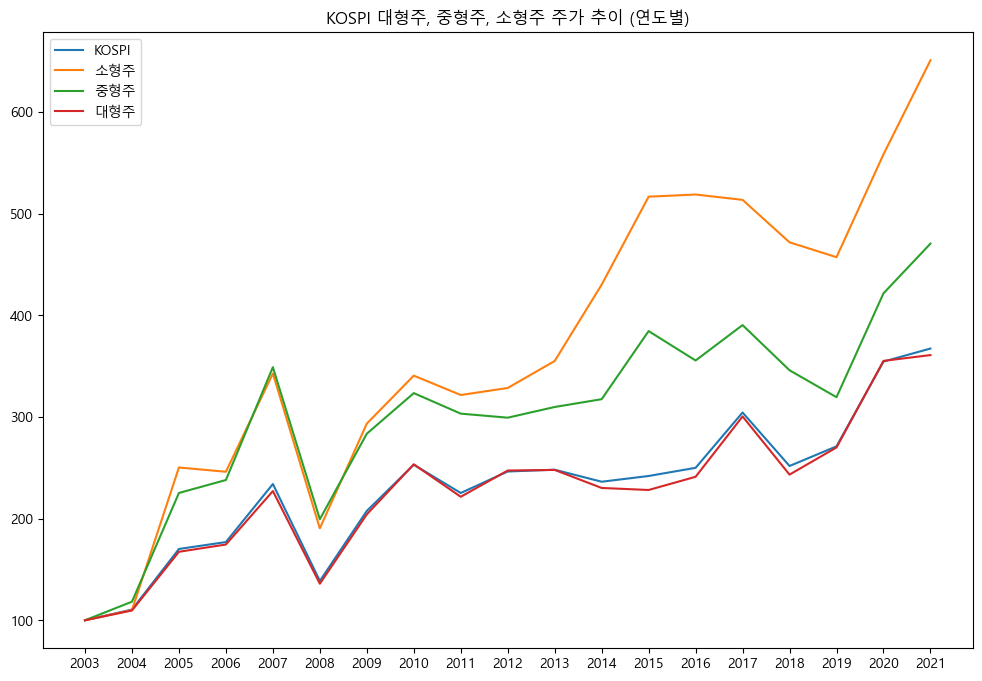

In [2]:


tmp = []
for ticker in stock.get_index_ticker_list():
    tmp.append([ticker, stock.get_index_ticker_name(ticker)])

# 데이터 프레임 생성
scale_2022 = pd.DataFrame(tmp).iloc[:4,:]

# 열 명 변경
scale_2022.columns = ['ticker','name2022']

# DataFrame 구축

# DF 생성
df_scale_day = pd.DataFrame([])          # 일단위 데이터
df_scale_month = pd.DataFrame([])        # 월단위 데이터
df_scale_year = pd.DataFrame([])         # 년단위 데이터

# DF 내용 쓰기
for j in range(scale_2022.iloc[:,0].count()):
    # ticker 값을 i에 저장
    i = scale_2022.iloc[j,0]
    
    # temp DF에 2000.01.01~2022.09.01 규모별 ohlcv와 fundamental 쓰기(merge 이용하여 옆으로 붙임.)
    temp_day = pd.merge(stock.get_index_ohlcv("20030301", "20220901", str(i)).reset_index(), 
                     stock.get_index_fundamental("20030301", "20220901", str(i)).reset_index(), 
                     how='outer')
    temp_month = stock.get_index_ohlcv("20030301", "20220901", str(i),'m').reset_index()
                
    temp_year = stock.get_index_ohlcv("20030301", "20211231", str(i),'y').reset_index()
    
    # 해당 섹터 ticker, 섹터 명칭 쓰기
    temp_day['scale_name'] = stock.get_index_ticker_name(i)
    temp_day['scale_ticker'] = i
    
    temp_month['scale_name'] = stock.get_index_ticker_name(i)
    temp_month['scale_ticker'] = i
    
    temp_year['scale_name'] = stock.get_index_ticker_name(i)
    temp_year['scale_ticker'] = i
    
    # 임시 DF를 결과물 DF에 합치기
    df_scale_day = pd.concat([df_scale_day,temp_day])
    df_scale_month = pd.concat([df_scale_month,temp_month])
    df_scale_year = pd.concat([df_scale_year,temp_year])

# 칼럼명 영어로 변환
df_scale_day.columns = ['date','Open','High','Low','Close','Volume','Volume($)',
                     'Market_Cap','Change','PER','FWDPER','PBR','dividend_Yield','scale_name','scale_ticker']
df_scale_month.columns = ['date','Open','High','Low','Close','Volume','Volume($)','scale_name','scale_ticker']
df_scale_year.columns = ['date','Open','High','Low','Close','Volume','Volume($)','scale_name','scale_ticker']

# 일별 데이터를 규모별로 분리
df_scale_day_kospi = df_scale_day[df_scale_day['scale_name']=='코스피'] 
df_scale_day_small = df_scale_day[df_scale_day['scale_name']=='코스피 소형주']
df_scale_day_medium = df_scale_day[df_scale_day['scale_name']=='코스피 중형주']
df_scale_day_large = df_scale_day[df_scale_day['scale_name']=='코스피 대형주']

# 월별 데이터를 규모별로 분리
df_scale_month_kospi = df_scale_month[df_scale_month['scale_name']=='코스피']
df_scale_month_small = df_scale_month[df_scale_month['scale_name']=='코스피 소형주']
df_scale_month_medium = df_scale_month[df_scale_month['scale_name']=='코스피 중형주']
df_scale_month_large = df_scale_month[df_scale_month['scale_name']=='코스피 대형주']

# 연도별 데이터를 규모별로 분리
df_scale_year_kospi = df_scale_year[df_scale_year['scale_name']=='코스피']
df_scale_year_small = df_scale_year[df_scale_year['scale_name']=='코스피 소형주']
df_scale_year_medium = df_scale_year[df_scale_year['scale_name']=='코스피 중형주']
df_scale_year_large = df_scale_year[df_scale_year['scale_name']=='코스피 대형주']

df_scale_year_kospi_index = (df_scale_year_kospi['Close'] / df_scale_year_kospi['Close'][0]) * 100
df_scale_year_small_index = (df_scale_year_small['Close'] / df_scale_year_small['Close'][0]) * 100
df_scale_year_medium_index = (df_scale_year_medium['Close'] / df_scale_year_medium['Close'][0]) * 100
df_scale_year_large_index = (df_scale_year_large['Close'] / df_scale_year_large['Close'][0]) * 100

df_scale_month_kospi_index = (df_scale_month_kospi['Close'] / df_scale_month_kospi['Close'][0]) * 100
df_scale_month_small_index = (df_scale_month_small['Close'] / df_scale_month_small['Close'][0]) * 100
df_scale_month_medium_index = (df_scale_month_medium['Close'] / df_scale_month_medium['Close'][0]) * 100
df_scale_month_large_index = (df_scale_month_large['Close'] / df_scale_month_large['Close'][0]) * 100

df_scale_day_kospi_index = (df_scale_day_kospi['Close'] / df_scale_day_kospi['Close'][0]) * 100
df_scale_day_small_index = (df_scale_day_small['Close'] / df_scale_day_small['Close'][0]) * 100
df_scale_day_medium_index = (df_scale_day_medium['Close'] / df_scale_day_medium['Close'][0]) * 100
df_scale_day_large_index = (df_scale_day_large['Close'] / df_scale_day_large['Close'][0]) * 100


# Visualization: KOSPI 대형주, 중형주, 소형주 주가 추이 (연도별)

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정 (맑은 고딕체)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

xtick_label_position = list(range(len(df_scale_year['date'].dt.year.unique())))

ax.set_xticks(xtick_label_position)
ax.set_xticklabels(df_scale_year_large['date'].dt.year.unique())
ax.plot(xtick_label_position,df_scale_year_kospi_index,label="KOSPI")
ax.plot(df_scale_year_small_index,label="소형주")
ax.plot(df_scale_year_medium_index,label="중형주")
ax.plot(df_scale_year_large_index,label="대형주")

plt.legend()
plt.title("KOSPI 대형주, 중형주, 소형주 주가 추이 (연도별)")